# Mini Project

In this mini project I will be analysing world development indicator data to answer the following research question:
**What is the relationship between regional healthcare expenditure per capita and the mortality rate of children below five years of age?**

The data used in this project was retrieved from Kaggle: https://www.kaggle.com/manchunhui/wdi-dataset-preliminary-eda. 

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import data

In [3]:
wdi_data = pd.read_csv("../Data/WDIData.csv")

### Reshape data using pandas melt function

In [4]:
wdi_data = (
    wdi_data.drop(columns="Unnamed: 65")
    .melt(
        id_vars=["Country Code", "Country Name", "Indicator Code", "Indicator Name"],
        var_name="Year",
        value_name="Value",
    )
    .reset_index(drop=True)
)
wdi_data["Year"] = wdi_data["Year"].astype(int)

### Conduct an initial exploration of the data

What are the data dimensions?

In [6]:
wdi_data.shape

(23141448, 6)

The dataset has 66 columns and 379368 rows. What information is contained in these columns?

In [7]:
wdi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23141448 entries, 0 to 23141447
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Code    object 
 1   Country Name    object 
 2   Indicator Code  object 
 3   Indicator Name  object 
 4   Year            int32  
 5   Value           float64
dtypes: float64(1), int32(1), object(4)
memory usage: 971.1+ MB


How many missing values are present?

In [8]:
wdi_data.isna().sum()

Country Code             0
Country Name             0
Indicator Code           0
Indicator Name           0
Year                     0
Value             15562642
dtype: int64

How many unique countries are present?

In [9]:
len(wdi_data["Country Name"].unique())

264

How many unique indicators are present?

In [153]:
len(wdi_data["Indicator Name"].unique())

1437

### Filter the data

Create masks to filter the data by indicators of interest. The indicators of interest are the under five mortality rate and current health expenditure per capita.

In [12]:
child_mortality_mask = (
    wdi_data["Indicator Name"] == "Mortality rate, under-5 (per 1,000 live births)"
)

health_expenditure_mask = (
    wdi_data["Indicator Name"] == "Current health expenditure per capita (current US$)"
)

Create a mask to remove national or global country groupings. I would only like to include the regional data for further analysis. The first 47 entries in the countries list are country groupings that need to be removed.

In [63]:
countries = wdi_data["Country Name"].unique()
country_mask = ~wdi_data["Country Name"].isin(countries[:47])

Filter the dataset using the created masks

In [14]:
child_mortality_data = (
    wdi_data[(child_mortality_mask) & (country_mask)]
    .dropna()
    .rename(columns={"Value": "Mortality Rate Value"})
)
child_mortality_data.head(5)

,Country Code,Country Name,Indicator Code,Indicator Name,Year,Mortality Rate Value
71210,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,240.5
76958,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,86.2
82706,AUS,Australia,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,24.8
84143,AUT,Austria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,42.8
88454,BHR,Bahrain,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,198.4


In [15]:
health_expenditure_data = (
    wdi_data[(health_expenditure_mask) & (country_mask)]
    .dropna()
    .rename(columns={"Value": "Health Expenditure Value"})
)
health_expenditure_data.head(5)

,Country Code,Country Name,Indicator Code,Indicator Name,Year,Health Expenditure Value
15245423,DZA,Algeria,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2000,61.302891
15248297,AND,Andorra,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2000,2050.647461
15249734,AGO,Angola,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2000,12.963032
15251171,ATG,Antigua and Barbuda,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2000,444.939423
15252608,ARG,Argentina,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,2000,705.199341


### The dataset contains regional data from 1960 to 2019. Which year should I choose for my analysis? I need to choose the most recent year with regional data present for both indicators of interest.

Combine the data for both indicators into a single dataframe using an outer merge. We can observe that some countries have missing indicator data for one or both indicators of interest.

In [31]:
health_expenditure_child_mortality_data = pd.merge(
    child_mortality_data,
    health_expenditure_data,
    how="outer",
    on=["Country Code", "Country Name", "Year"],
)
health_expenditure_child_mortality_data.head(5)

,Country Code,Country Name,Indicator Code_x,Indicator Name_x,Year,Mortality Rate Value,Indicator Code_y,Indicator Name_y,Health Expenditure Value
0,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,240.5,NaN,NaN,NaN
1,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,86.2,NaN,NaN,NaN
2,AUS,Australia,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,24.8,NaN,NaN,NaN
3,AUT,Austria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,42.8,NaN,NaN,NaN
4,BHR,Bahrain,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,198.4,NaN,NaN,NaN


Indicate whether data is missing for one or both indicators for a particular country and year.

In [32]:
health_expenditure_child_mortality_data["Missing Data Count"] = (
    health_expenditure_child_mortality_data[
        ["Mortality Rate Value", "Health Expenditure Value"]
    ]
    .isna()
    .sum(axis=1)
)
health_expenditure_child_mortality_data["Data Present"] = np.where(
    health_expenditure_child_mortality_data["Missing Data Count"] == 0, True, False
)
health_expenditure_child_mortality_data.head(5)

,Country Code,Country Name,Indicator Code_x,Indicator Name_x,Year,Mortality Rate Value,Indicator Code_y,Indicator Name_y,Health Expenditure Value,Missing Data Count,Data Present
0,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,240.5,NaN,NaN,NaN,1,False
1,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,86.2,NaN,NaN,NaN,1,False
2,AUS,Australia,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,24.8,NaN,NaN,NaN,1,False
3,AUT,Austria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,42.8,NaN,NaN,NaN,1,False
4,BHR,Bahrain,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",1960,198.4,NaN,NaN,NaN,1,False


Count the number of countries with and without missing indicator data

In [56]:
missing_data_count = (
    health_expenditure_child_mortality_data[["Country Name", "Year", "Data Present"]]
    .groupby(["Year", "Data Present"])
    .count()
    .rename(columns={"Country Name": "Country Count"})
    .reset_index()
    .sort_values(by=["Year", "Country Count"], ascending=True)
)
missing_data_count.tail(20)

,Year,Data Present,Country Count
58,2009,False,7
59,2009,True,186
60,2010,False,6
61,2010,True,187
62,2011,False,6
63,2011,True,187
64,2012,False,7
65,2012,True,186
66,2013,False,8
67,2013,True,185


Create a histogram to visualise the data presence and missingness for the indicators of interest from 1960 to 2019 using Seaborn.

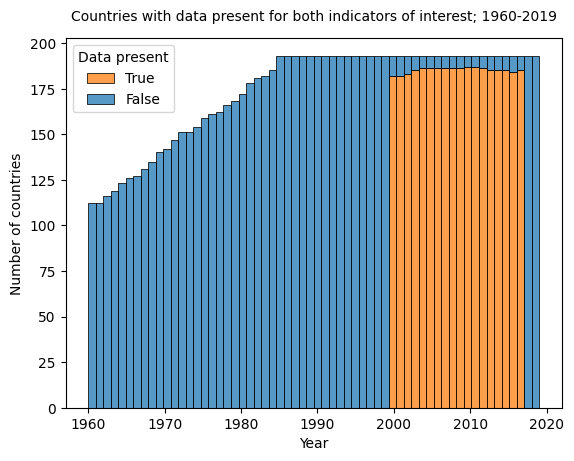

In [57]:
# Define a custom color palette
custom_palette = sns.color_palette("tab10", 2)

# Define the hue order
hue_order = ["False", "True"]

# Generate the histogram
sns.histplot(
    data=missing_data_count,
    x="Year",
    stat="count",
    hue="Data Present",
    weights="Country Count",
    multiple="stack",
    bins=60,
    palette=custom_palette,
)

# Edit the figure labels and legend
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of countries", fontsize=10)
plt.title(
    "Countries with data present for both indicators of interest; 1960-2019",
    fontsize=10,
    y=1.025,
)
plt.tick_params(axis="x", labelsize=10)
plt.legend(["True", "False"], title="Data present")

# Save and show the figure
plt.savefig("../Results/Figures/Data missingness_histogram.png", dpi=1200)
plt.show()

The plot above indicates that data was present for both indicators of interest for the 2000-2017 time period. 2017 was the most recent year with regional data for both indicators.

### Determine the relationship between regional current health expenditure per capita vs under five mortality rate for the year of interest

Create a mask to filter the data by year of interest (2017)

In [58]:
year_mask = health_expenditure_child_mortality_data["Year"] == 2017

Apply the year filter and remove missing data

In [60]:
health_expenditure_child_mortality_data_2017 = health_expenditure_child_mortality_data[
    year_mask
].dropna()
health_expenditure_child_mortality_data_2017.head(5)

,Country Code,Country Name,Indicator Code_x,Indicator Name_x,Year,Mortality Rate Value,Indicator Code_y,Indicator Name_y,Health Expenditure Value,Missing Data Count,Data Present
9876,AFG,Afghanistan,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,64.9,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,67.122650,0,True
9878,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,24.3,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,258.494293,0,True
9879,AND,Andorra,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,3.2,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,4040.786621,0,True
9880,AGO,Angola,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,80.6,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,114.459641,0,True
9881,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,7.1,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,673.859680,0,True


Assign the countries to super population groups according to UNICEF regional classification resource: https://data.unicef.org/regionalclassifications/. Annotate the plot data by these super population groups.

In [61]:
# Assign super population group classifications to the represented countries

super_population_classifications = {
    "Afghanistan": "South Asia",
    "Algeria": "Middle East and North Africa",
    "Andorra": "Western Europe",
    "Angola": "Eastern and Southern Africa",
    "Antigua and Barbuda": "Latin America and Caribbean",
    "Argentina": "Latin America and Caribbean",
    "Armenia": "Eastern Europe and Central Asia",
    "Australia": "East Asia and Pacific",
    "Austria": "Western Europe",
    "Azerbaijan": "Eastern Europe and Central Asia",
    "Bahamas, The": "Latin America and Caribbean",
    "Bahrain": "Middle East and North Africa",
    "Bangladesh": "South Asia",
    "Barbados": "Latin America and Caribbean",
    "Belarus": "Eastern Europe and Central Asia",
    "Belgium": "Western Europe",
    "Belize": "Latin America and Caribbean",
    "Benin": "West and Central Africa",
    "Bhutan": "South Asia",
    "Bolivia": "Latin America and Caribbean",
    "Bosnia and Herzegovina": "Eastern Europe and Central Asia",
    "Botswana": "Eastern and Southern Africa",
    "Brazil": "Latin America and Caribbean",
    "Brunei Darussalam": "East Asia and Pacific",
    "Bulgaria": "Eastern Europe and Central Asia",
    "Burkina Faso": "West and Central Africa",
    "Burundi": "Eastern and Southern Africa",
    "Cabo Verde": "West and Central Africa",
    "Cambodia": "East Asia and Pacific",
    "Cameroon": "West and Central Africa",
    "Canada": "North America",
    "Central African Republic": "West and Central Africa",
    "Chad": "West and Central Africa",
    "Chile": "Latin America and Caribbean",
    "China": "East Asia and Pacific",
    "Colombia": "Latin America and Caribbean",
    "Comoros": "Eastern and Southern Africa",
    "Congo, Dem. Rep.": "West and Central Africa",
    "Congo, Rep.": "West and Central Africa",
    "Costa Rica": "Latin America and Caribbean",
    "Cote d'Ivoire": "West and Central Africa",
    "Croatia": "Eastern Europe and Central Asia",
    "Cuba": "Latin America and Caribbean",
    "Cyprus": "Western Europe",
    "Czech Republic": "Western Europe",
    "Denmark": "Western Europe",
    "Djibouti": "Eastern and Southern Africa",
    "Dominica": "Latin America and Caribbean",
    "Dominican Republic": "Latin America and Caribbean",
    "Ecuador": "Latin America and Caribbean",
    "Egypt, Arab Rep.": "Middle East and North Africa",
    "El Salvador": "Latin America and Caribbean",
    "Equatorial Guinea": "West and Central Africa",
    "Eritrea": "Eastern and Southern Africa",
    "Estonia": "Western Europe",
    "Eswatini": "Eastern and Southern Africa",
    "Ethiopia": "Eastern and Southern Africa",
    "Fiji": "East Asia and Pacific",
    "Finland": "Western Europe",
    "France": "Western Europe",
    "Gabon": "West and Central Africa",
    "Gambia, The": "West and Central Africa",
    "Georgia": "Eastern Europe and Central Asia",
    "Germany": "Western Europe",
    "Ghana": "West and Central Africa",
    "Greece": "Western Europe",
    "Grenada": "Latin America and Caribbean",
    "Guatemala": "Latin America and Caribbean",
    "Guinea": "West and Central Africa",
    "Guinea-Bissau": "West and Central Africa",
    "Guyana": "Latin America and Caribbean",
    "Haiti": "Latin America and Caribbean",
    "Honduras": "Latin America and Caribbean",
    "Hungary": "Western Europe",
    "Iceland": "Western Europe",
    "India": "South Asia",
    "Indonesia": "East Asia and Pacific",
    "Iran, Islamic Rep.": "Middle East and North Africa",
    "Iraq": "Middle East and North Africa",
    "Ireland": "Western Europe",
    "Israel": "Middle East and North Africa",
    "Italy": "Western Europe",
    "Jamaica": "Latin America and Caribbean",
    "Japan": "East Asia and Pacific",
    "Jordan": "Middle East and North Africa",
    "Kazakhstan": "Eastern Europe and Central Asia",
    "Kenya": "Eastern and Southern Africa",
    "Kiribati": "East Asia and Pacific",
    "Korea, Rep.": "East Asia and Pacific",
    "Kuwait": "Middle East and North Africa",
    "Kyrgyz Republic": "Eastern Europe and Central Asia",
    "Lao PDR": "East Asia and Pacific",
    "Latvia": "Western Europe",
    "Lebanon": "Middle East and North Africa",
    "Lesotho": "Eastern and Southern Africa",
    "Liberia": "West and Central Africa",
    "Lithuania": "Western Europe",
    "Luxembourg": "Western Europe",
    "Madagascar": "Eastern and Southern Africa",
    "Malawi": "Eastern and Southern Africa",
    "Malaysia": "East Asia and Pacific",
    "Maldives": "South Asia",
    "Mali": "West and Central Africa",
    "Malta": "Western Europe",
    "Marshall Islands": "East Asia and Pacific",
    "Mauritania": "West and Central Africa",
    "Mauritius": "Eastern and Southern Africa",
    "Mexico": "Latin America and Caribbean",
    "Micronesia, Fed. Sts.": "East Asia and Pacific",
    "Moldova": "Eastern Europe and Central Asia",
    "Monaco": "Western Europe",
    "Mongolia": "East Asia and Pacific",
    "Morocco": "Middle East and North Africa",
    "Mozambique": "Eastern and Southern Africa",
    "Myanmar": "East Asia and Pacific",
    "Namibia": "Eastern and Southern Africa",
    "Nauru": "East Asia and Pacific",
    "Nepal": "South Asia",
    "Netherlands": "Western Europe",
    "New Zealand": "East Asia and Pacific",
    "Nicaragua": "Latin America and Caribbean",
    "Niger": "West and Central Africa",
    "Nigeria": "West and Central Africa",
    "North Macedonia": "Eastern Europe and Central Asia",
    "Norway": "Western Europe",
    "Oman": "Middle East and North Africa",
    "Pakistan": "South Asia",
    "Palau": "East Asia and Pacific",
    "Panama": "Latin America and Caribbean",
    "Papua New Guinea": "East Asia and Pacific",
    "Paraguay": "Latin America and Caribbean",
    "Peru": "Latin America and Caribbean",
    "Philippines": "East Asia and Pacific",
    "Poland": "Western Europe",
    "Portugal": "Western Europe",
    "Qatar": "Middle East and North Africa",
    "Romania": "Eastern Europe and Central Asia",
    "Russian Federation": "Eastern Europe and Central Asia",
    "Rwanda": "Eastern and Southern Africa",
    "Samoa": "East Asia and Pacific",
    "San Marino": "Western Europe",
    "Sao Tome and Principe": "West and Central Africa",
    "Saudi Arabia": "Middle East and North Africa",
    "Senegal": "West and Central Africa",
    "Serbia": "Eastern Europe and Central Asia",
    "Seychelles": "Eastern and Southern Africa",
    "Sierra Leone": "West and Central Africa",
    "Singapore": "East Asia and Pacific",
    "Slovak Republic": "Western Europe",
    "Slovenia": "Western Europe",
    "Solomon Islands": "East Asia and Pacific",
    "South Africa": "Eastern and Southern Africa",
    "South Sudan": "Eastern and Southern Africa",
    "Spain": "Western Europe",
    "Sri Lanka": "South Asia",
    "St. Kitts and Nevis": "Latin America and Caribbean",
    "St. Lucia": "Latin America and Caribbean",
    "St. Vincent and the Grenadines": "Latin America and Caribbean",
    "Sudan": "Eastern and Southern Africa",
    "Suriname": "Latin America and Caribbean",
    "Sweden": "Western Europe",
    "Switzerland": "Western Europe",
    "Tajikistan": "Eastern Europe and Central Asia",
    "Tanzania": "Eastern and Southern Africa",
    "Thailand": "East Asia and Pacific",
    "Timor-Leste": "East Asia and Pacific",
    "Togo": "West and Central Africa",
    "Tonga": "East Asia and Pacific",
    "Trinidad and Tobago": "Latin America and Caribbean",
    "Tunisia": "Middle East and North Africa",
    "Turkey": "Eastern Europe and Central Asia",
    "Turkmenistan": "Eastern Europe and Central Asia",
    "Tuvalu": "East Asia and Pacific",
    "Uganda": "Eastern and Southern Africa",
    "Ukraine": "Eastern Europe and Central Asia",
    "United Arab Emirates": "Middle East and North Africa",
    "United Kingdom": "Western Europe",
    "United States": "North America",
    "Uruguay": "Latin America and Caribbean",
    "Uzbekistan": "Eastern Europe and Central Asia",
    "Vanuatu": "East Asia and Pacific",
    "Venezuela, RB": "Latin America and Caribbean",
    "Vietnam": "East Asia and Pacific",
    "Zambia": "Eastern and Southern Africa",
    "Zimbabwe": "Eastern and Southern Africa",
}

health_expenditure_child_mortality_data_2017[
    "Population Grouping"
] = health_expenditure_child_mortality_data_2017["Country Name"].map(
    super_population_classifications
)
health_expenditure_child_mortality_data_2017.head(5)

,Country Code,Country Name,Indicator Code_x,Indicator Name_x,Year,Mortality Rate Value,Indicator Code_y,Indicator Name_y,Health Expenditure Value,Missing Data Count,Data Present,Population Grouping
9876,AFG,Afghanistan,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,64.9,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,67.122650,0,True,South Asia
9878,DZA,Algeria,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,24.3,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,258.494293,0,True,Middle East and North Africa
9879,AND,Andorra,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,3.2,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,4040.786621,0,True,Western Europe
9880,AGO,Angola,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,80.6,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,114.459641,0,True,Eastern and Southern Africa
9881,ATG,Antigua and Barbuda,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",2017,7.1,SH.XPD.CHEX.PC.CD,Current health expenditure per capita (current...,673.859680,0,True,Latin America and Caribbean


Plot the regional health expenditure and mortality rate for 2017

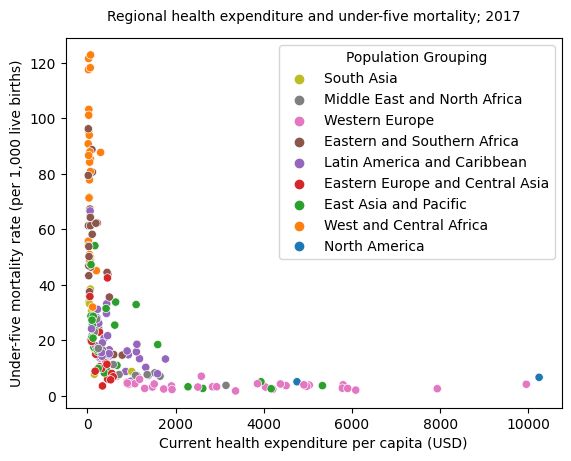

In [62]:
custom_palette = sns.color_palette("tab10_r", 9)

x = health_expenditure_child_mortality_data_2017["Health Expenditure Value"]
y = health_expenditure_child_mortality_data_2017["Mortality Rate Value"]
hue = health_expenditure_child_mortality_data_2017["Population Grouping"]

sns.scatterplot(x=x, y=y, hue=hue, palette=custom_palette)
plt.xlabel("Current health expenditure per capita (USD)", fontsize=10)
plt.ylabel("Under-five mortality rate (per 1,000 live births)", fontsize=10)
plt.title(
    "Regional health expenditure and under-five mortality; 2017", fontsize=10, y=1.025
)

plt.savefig("../Results/Figures/health_expenditure_vs_mortality_scatterplot.png", dpi=1200)
plt.show()

Calculate the correlation coefficient for health expenditure and under-five mortality

In [172]:
np.corrcoef(x, y)

array([[ 1.        , -0.45137481],
       [-0.45137481,  1.        ]])

The regional health expenditure per capita and under-five mortality rate have a moderate inverse relationship (correlation coefficient = -0.451). This means that an increase in health expenditure was associated with a moderate decrease in under-five mortality for 2017.